In [1]:
var openDigger = require('../src/open_digger');
var my_repo_id =2126244 ;

# ***twbs/bootstrap项目分析***

##  1 每月新增Star和Fork的个数

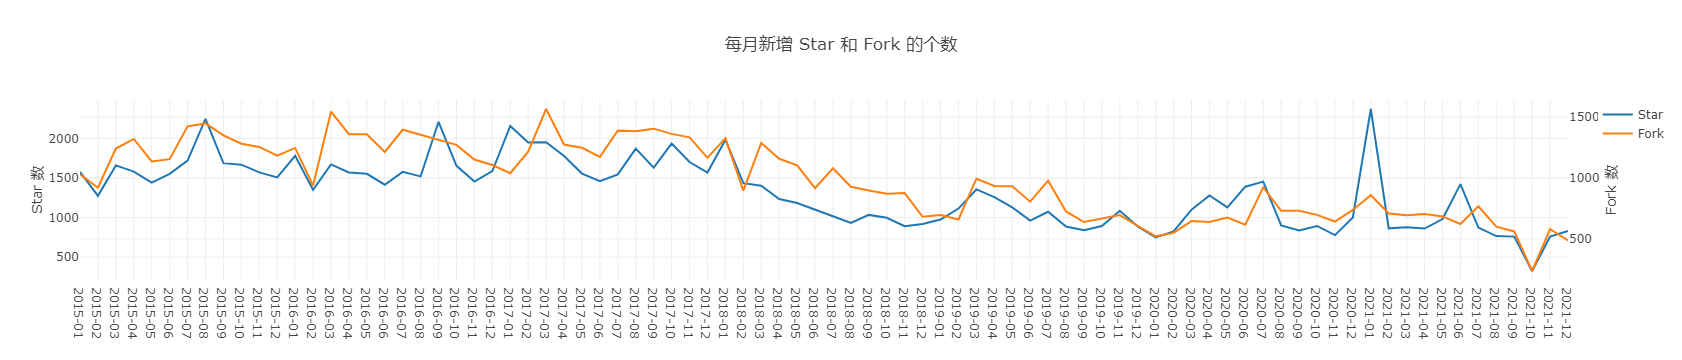

┌─────────┬───────────┬──────────────┬──────────────┐
│ (index) │   时间    │ 新增 Star 数 │ 新增 Fork 数 │
├─────────┼───────────┼──────────────┼──────────────┤
│    0    │ '2015-01' │     1577     │     1030     │
│    1    │ '2015-02' │     1274     │     920      │
│    2    │ '2015-03' │     1659     │     1241     │
│    3    │ '2015-04' │     1581     │     1320     │
│    4    │ '2015-05' │     1441     │     1136     │
│    5    │ '2015-06' │     1552     │     1154     │
│    6    │ '2015-07' │     1719     │     1423     │
│    7    │ '2015-08' │     2249     │     1447     │
│    8    │ '2015-09' │     1688     │     1349     │
│    9    │ '2015-10' │     1669     │     1281     │
│   10    │ '2015-11' │     1571     │     1254     │
│   11    │ '2015-12' │     1508     │     1182     │
│   12    │ '2016-01' │     1781     │     1246     │
│   13    │ '2016-02' │     1350     │     938      │
│   14    │ '2016-03' │     1672     │     1543     │
│   15    │ '2016-04' │     1570    

In [2]:
var query = openDigger.driver.clickhouse.query;
query(`
    select t1.time as time1, t2.time as time2, stars, forks
    from 
        (select count(*) as stars ,
        formatDateTime(created_at, '%Y-%m') as time
        from github_log.events
        where repo_id=${my_repo_id} and type='WatchEvent' and time between '2015-01' and '2021-12'
        group by formatDateTime(created_at, '%Y-%m')
        order by formatDateTime(created_at, '%Y-%m')) t1
    
        FULL OUTER JOIN
    
        (select count(*) as forks ,
        formatDateTime(created_at, '%Y-%m') as time
        from github_log.events
        where repo_id=${my_repo_id} and type='ForkEvent' and time between '2015-01' and '2021-12'
        group by formatDateTime(created_at, '%Y-%m')
        order by formatDateTime(created_at, '%Y-%m')) t2
    
        ON t1.time=t2.time
    `
).then(data => {
    var stars = [], forks=[], time = [], tt = [];
    data.forEach(dd => {
        stars.push(parseInt(dd.stars));
        forks.push(parseInt(dd.forks));
        if (dd.time1!='') {
            time.push(dd.time1);
            tt.push({'时间':dd.time1, '新增 Star 数':parseInt(dd.stars), '新增 Fork 数':parseInt(dd.forks)});
        }
        else {
            time.push(dd.time2);
            tt.push({'时间':dd.time2, '新增 Star 数':parseInt(dd.stars), '新增 Fork 数':parseInt(dd.forks)});
        }
    });
    openDigger.render.plotly([
        {x: time, y: stars, mode:'line', name:'Star'}, 
        {x: time, y: forks, mode:'line', name:'Fork',yaxis: 'y2'}
    ], {
        title: '每月新增 Star 和 Fork 的个数',
        yaxis: { title: 'Star 数'},
        yaxis2: { overlaying: 'y', side: 'right', anchor: 'x', title: 'Fork 数'},
        xaxis: {type: 'category'}
    });
    console.table(tt)
});


## 2 每月打开 Issue 和关闭 Issue 的个数

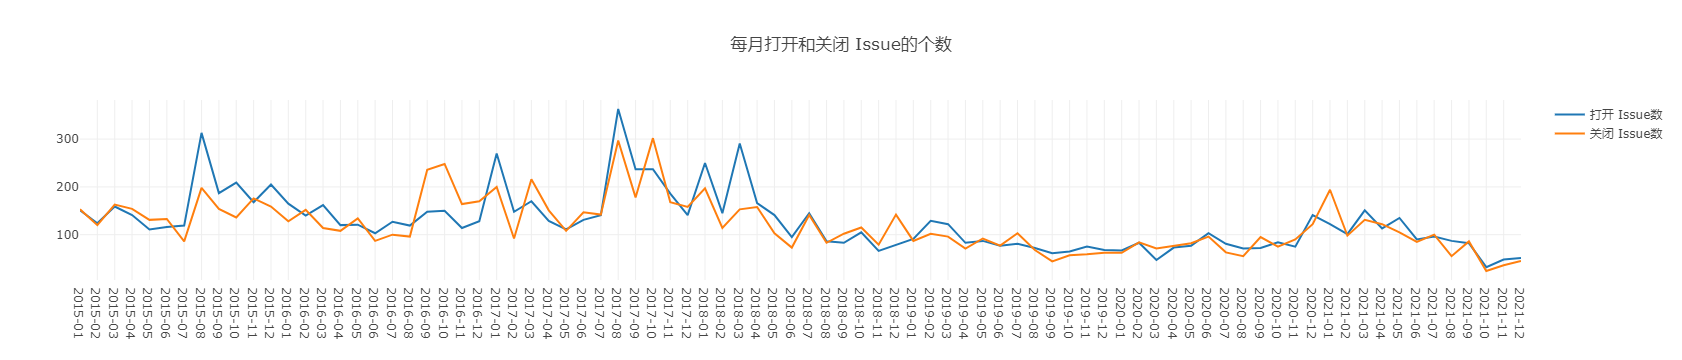

┌─────────┬───────────┬───────────────┬───────────────┐
│ (index) │   时间    │ 打开 Issue 数 │ 关闭 Issue 数 │
├─────────┼───────────┼───────────────┼───────────────┤
│    0    │ '2015-01' │      151      │      153      │
│    1    │ '2015-02' │      124      │      120      │
│    2    │ '2015-03' │      159      │      163      │
│    3    │ '2015-04' │      141      │      154      │
│    4    │ '2015-05' │      111      │      131      │
│    5    │ '2015-06' │      116      │      133      │
│    6    │ '2015-07' │      119      │      86       │
│    7    │ '2015-08' │      313      │      198      │
│    8    │ '2015-09' │      187      │      154      │
│    9    │ '2015-10' │      209      │      136      │
│   10    │ '2015-11' │      168      │      176      │
│   11    │ '2015-12' │      205      │      159      │
│   12    │ '2016-01' │      165      │      128      │
│   13    │ '2016-02' │      140      │      152      │
│   14    │ '2016-03' │      162      │      114      │


In [3]:
query( `
    select t1.time as time1, t2.time as time2, open_issues, close_issues
    from 
        (select count(*) as open_issues,
        formatDateTime(created_at, '%Y-%m') as time
        from github_log.events
        where repo_id=${my_repo_id} and type = 'IssuesEvent' and action in('opened','reopened') and time between '2015-01' and '2021-12'
        group by formatDateTime(created_at, '%Y-%m')
        order by formatDateTime(created_at, '%Y-%m')) t1
    
        FULL OUTER JOIN
    
        (select count(*) as close_issues,
        formatDateTime(created_at, '%Y-%m') as time
        from github_log.events
        where repo_id=${my_repo_id} and type = 'IssuesEvent' and action='closed' and time between '2015-01' and '2021-12'
        group by formatDateTime(created_at, '%Y-%m')
        order by formatDateTime(created_at, '%Y-%m')) t2
    
        ON t1.time=t2.time
    `
).then(data => {
    var open_issues = [], close_issues=[], time = [], tt = [];
    data.forEach(dd => {
        open_issues.push(parseInt(dd.open_issues));
        close_issues.push(parseInt(dd.close_issues));
        if (dd.time1!='') {
            time.push(dd.time1);
            tt.push({'时间':dd.time1, '打开 Issue 数':parseInt(dd.open_issues), '关闭 Issue 数':parseInt(dd.close_issues)});
        }
        else {
            time.push(dd.time2);
            tt.push({'时间':dd.time2, '打开 Issue 数':parseInt(dd.open_issues), '关闭 Issue 数':parseInt(dd.close_issues)});
        }
    });
    openDigger.render.plotly([
        {x: time, y: open_issues, mode:'line', name:'打开 Issue数'}, 
        {x: time, y: close_issues, mode:'line', name:'关闭 Issue数'}
    ], {
        title: '每月打开和关闭 Issue的个数',
        xaxis: {type: 'category'}
    });
    console.table(tt)
});

## 3 每月打开 PR 和合入 PR 的个数

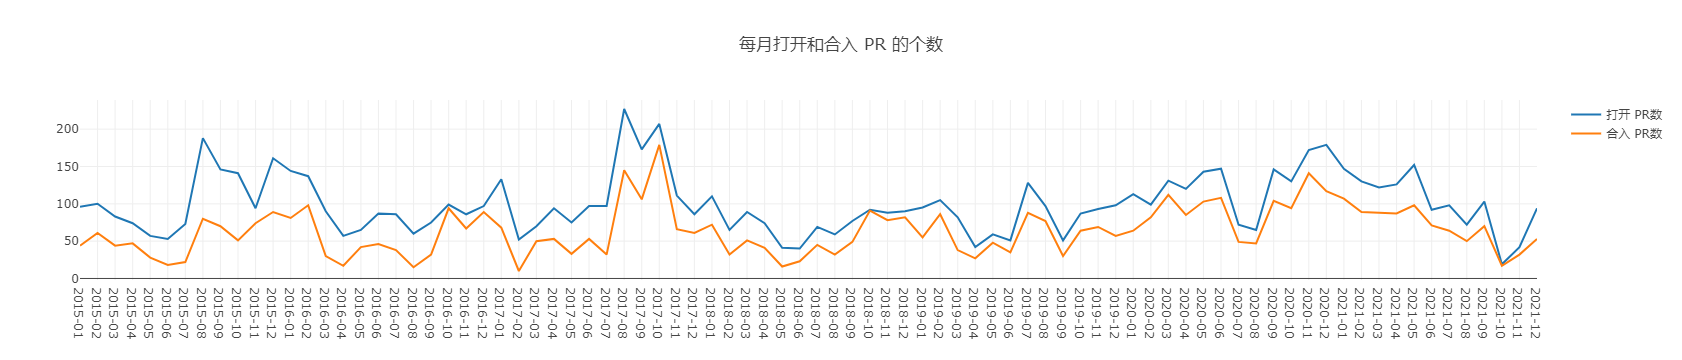

┌─────────┬───────────┬────────────┬────────────┐
│ (index) │   时间    │ 打开 PR 数 │ 合入 PR 数 │
├─────────┼───────────┼────────────┼────────────┤
│    0    │ '2015-01' │     96     │     44     │
│    1    │ '2015-02' │    100     │     61     │
│    2    │ '2015-03' │     83     │     44     │
│    3    │ '2015-04' │     74     │     47     │
│    4    │ '2015-05' │     57     │     28     │
│    5    │ '2015-06' │     53     │     18     │
│    6    │ '2015-07' │     73     │     22     │
│    7    │ '2015-08' │    188     │     80     │
│    8    │ '2015-09' │    146     │     70     │
│    9    │ '2015-10' │    141     │     51     │
│   10    │ '2015-11' │     94     │     74     │
│   11    │ '2015-12' │    161     │     89     │
│   12    │ '2016-01' │    144     │     81     │
│   13    │ '2016-02' │    137     │     98     │
│   14    │ '2016-03' │     90     │     30     │
│   15    │ '2016-04' │     57     │     17     │
│   16    │ '2016-05' │     65     │     42     │
│   17  

In [4]:
query (`
    select t1.time as time1, t2.time as time2, open_PR, merge_PR
    from 
        (select count(*) as open_PR,
        formatDateTime(created_at, '%Y-%m') as time
        from github_log.events
        where repo_id=${my_repo_id} and type = 'PullRequestEvent' and action in('opened','reopened') and time between '2015-01' and '2021-12'
        group by formatDateTime(created_at, '%Y-%m')
        order by formatDateTime(created_at, '%Y-%m')) t1
    
        FULL OUTER JOIN
    
        (select count(*) as merge_PR,
        formatDateTime(created_at, '%Y-%m') as time
        from github_log.events
        where repo_id=${my_repo_id} and type = 'PullRequestEvent' and action in('closed') and pull_merged=1 and time between '2015-01' and '2021-12'
        group by formatDateTime(created_at, '%Y-%m')
        order by formatDateTime(created_at, '%Y-%m')) t2
    
        ON t1.time=t2.time
    `
).then(data => {
    var open_PR = [], merge_PR=[], time = [], tt = [];
    data.forEach(dd => {
        open_PR.push(parseInt(dd.open_PR));
        merge_PR.push(parseInt(dd.merge_PR));
        if (dd.time1!='') {
            time.push(dd.time1);
            tt.push({'时间':dd.time1, '打开 PR 数':parseInt(dd.open_PR), '合入 PR 数':parseInt(dd.merge_PR)});
        }
        else {
            time.push(dd.time2);
            tt.push({'时间':dd.time2, '打开 PR 数':parseInt(dd.open_PR), '合入 PR 数':parseInt(dd.merge_PR)});
        }
    });
    openDigger.render.plotly([
        {x: time, y: open_PR, mode:'line', name:'打开 PR数'}, 
        {x: time, y: merge_PR, mode:'line', name:'合入 PR数'}
    ], {
        title: '每月打开和合入 PR 的个数',
        xaxis: {type: 'category'}
    });
    console.table(tt);
});

## 4 每月在仓库中活跃（只要有日志产生就算）的不同开发者总数

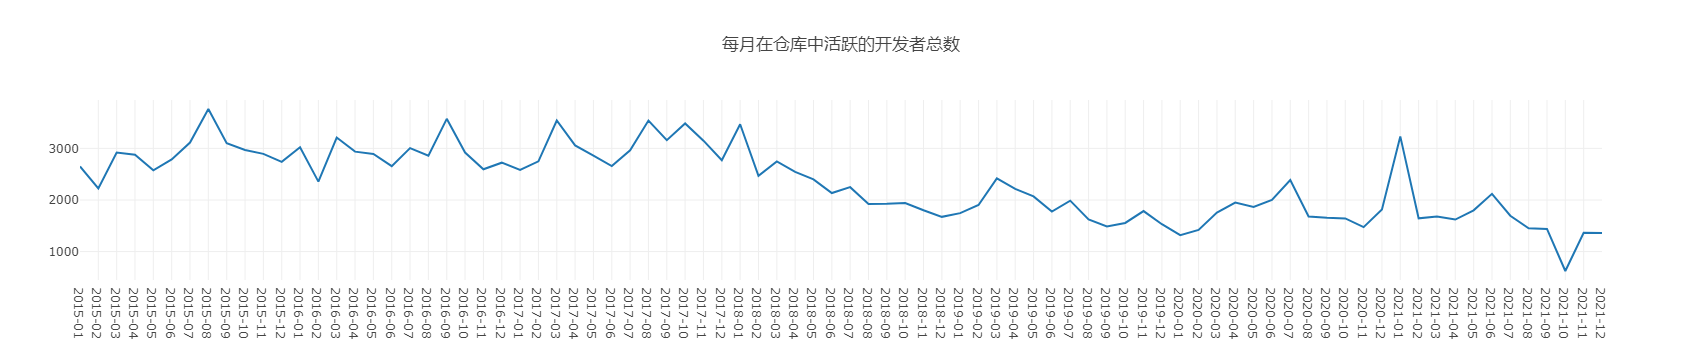

┌─────────┬───────────┬──────────────────┐
│ (index) │   时间    │ 活跃的开发者总数 │
├─────────┼───────────┼──────────────────┤
│    0    │ '2015-01' │       2650       │
│    1    │ '2015-02' │       2225       │
│    2    │ '2015-03' │       2918       │
│    3    │ '2015-04' │       2876       │
│    4    │ '2015-05' │       2574       │
│    5    │ '2015-06' │       2787       │
│    6    │ '2015-07' │       3113       │
│    7    │ '2015-08' │       3764       │
│    8    │ '2015-09' │       3102       │
│    9    │ '2015-10' │       2968       │
│   10    │ '2015-11' │       2894       │
│   11    │ '2015-12' │       2739       │
│   12    │ '2016-01' │       3022       │
│   13    │ '2016-02' │       2356       │
│   14    │ '2016-03' │       3210       │
│   15    │ '2016-04' │       2937       │
│   16    │ '2016-05' │       2892       │
│   17    │ '2016-06' │       2656       │
│   18    │ '2016-07' │       3006       │
│   19    │ '2016-08' │       2860       │
│   20    │ '2016-09'

In [5]:
query( `
    select count(distinct actor_id) as active_user,
    formatDateTime(created_at, '%Y-%m') as time
    from github_log.events
    where repo_id=${my_repo_id} and time between '2015-01' and '2021-12'
    group by formatDateTime(created_at, '%Y-%m')
    order by formatDateTime(created_at, '%Y-%m')
    `
).then(data => {
    var active_user = [], time = [], tt = [];
    data.forEach(dd => {
        active_user.push(parseInt(dd.active_user));
        time.push(dd.time);
        tt.push({'时间':dd.time,'活跃的开发者总数':parseInt(dd.active_user)});
    });
    openDigger.render.plotly(
        [{x: time, y: active_user, mode:"line"}], {
        title: '每月在仓库中活跃的开发者总数',
        xaxis: {type: 'category'}
    });
    console.table(tt);
});

## 5 Issue 从打开到关闭的平均时长和中位数（单位：天）

In [6]:
query(
    ` 
    select avg(dateDiff('day',issue_created_at,issue_closed_at)) as avg,median(dateDiff('day',issue_created_at,issue_closed_at)) as median
    from(
        select issue_created_at,issue_closed_at from github_log.events where repo_id=${my_repo_id} and type='IssuesEvent' and action='closed' and formatDateTime(created_at, '%Y-%m') between '2015-01' and '2021-12')  
    `
     ).then(res=>{
    console.log('Issue 从打开到关闭的平均时长：',res[0].avg.toFixed(2),'天');
    console.log('Issue 从打开到关闭的时长中位数：',res[0].median,'天');
});

Issue 从打开到关闭的平均时长： 55.04 天
Issue 从打开到关闭的时长中位数： 1 天


## 6 PR 从打开到合入的平均时长和中位数（单位：天）

In [7]:
query(
    ` 
    select avg(dateDiff('day',issue_created_at,pull_merged_at)) as avg,median(dateDiff('day',issue_created_at,pull_merged_at)) as median
    from(
        select issue_created_at,pull_merged_at from github_log.events where repo_id=${my_repo_id} and type='PullRequestEvent' and action='closed' and pull_merged=1 and formatDateTime(created_at, '%Y-%m') between '2015-01' and '2021-12')
    `
     ).then(res=>{
    console.log('PR 从打开到合入的平均时长：',res[0].avg.toFixed(2),'天');
    console.log('PR 从打开到合入的时长中位数：',res[0].median,'天');
});

PR 从打开到合入的平均时长： 13.30 天
PR 从打开到合入的时长中位数： 1 天


## 7 Issue和PR从打开到第一次有人回复（非本人回复）的平均时长和中位数（单位：天）

In [8]:
query(
    ` 
    select avg(first_comment_time) as avg_first_comment_time, median(first_comment_time) as median_first_comment_time
    from(
        select min(dateDiff('day',issue_created_at,issue_comment_created_at)) as first_comment_time
        from(
            select issue_id,issue_created_at,issue_comment_created_at from github_log.events where repo_id=${my_repo_id} and type='IssueCommentEvent' and action='created' and formatDateTime(created_at, '%Y-%m') between '2015-01' and '2021-12')
        group by issue_id)
    
    `
     ).then(res=>{
    console.log('Issue 从打开到第一次有人回复的平均时长：',res[0].avg_first_comment_time.toFixed(2),'天');
    console.log('Issue 从打开到第一次有人回复的时长中位数：',res[0].median_first_comment_time,'天');
});

Issue 从打开到第一次有人回复的平均时长： 43.84 天
Issue 从打开到第一次有人回复的时长中位数： 0 天


In [9]:
query(
    ` 
    select avg(first_comment_time) as avg_first_comment_time, median(first_comment_time) as median_first_comment_time
    from(
        select min(dateDiff('day',issue_created_at,pull_review_comment_created_at)) as first_comment_time
        from(
             select issue_id,issue_created_at,pull_review_comment_created_at from github_log.events where repo_id=${my_repo_id} and type='PullRequestReviewCommentEvent' and action='created' and formatDateTime(created_at, '%Y-%m') between '2015-01' and '2021-12')
        group by issue_id)
    
    `
     ).then(res=>{
    console.log('PR 从打开到第一次有人回复的平均时长：',res[0].avg_first_comment_time.toFixed(2),'天');
    console.log('PR 从打开到第一次有人回复的时长中位数：',res[0].median_first_comment_time,'天');
});

PR 从打开到第一次有人回复的平均时长： 12.12 天
PR 从打开到第一次有人回复的时长中位数： 0 天
